# Information Retrieval in High Dimensional Data

## Assignment 3

### Group 27 - Member List
<br/>

Wudamu -          Mtr. No 03721934 <br/>
Liang Tian -      Mtr. No 03721901 <br/>
Zhangyi Chen -    Mtr. No 03721831 <br/>
Shiwei Han -      Mtr. No 0372191902 <br/>
Xin Su -          Mtr. No 03728436


## The Kernel Trick
This Jupyter-Notebook contains a function for dimensionality reduction via PCA. The function `linear_pca` expects a data matrix $\mathbf{X}\in \mathbb{R}^{p\times N}$ and a number of PCs $k$ and returns the first $k$ PCA scores for the matrix $\mathbf{X}$.

In [3]:
import numpy as np

In [4]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

#### *Part A*
Provide code that tests the function with selected images from the provided MNIST training dataset by visualizing the first $2$ scores in a scatter plot.

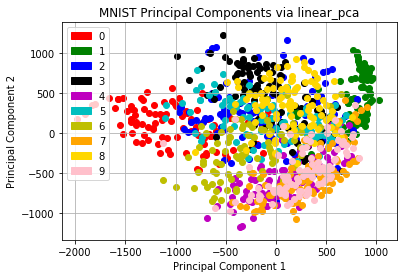

In [14]:
# Insert Code for Subtask 1.1 here
from PIL import Image
import imageio
import numpy as np
from os import listdir
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

# get the total number and the path of files (classes) d0---d9

num_classes = len(listdir('mnist'))## 10 classes in total, for mac system -1 to exclude the file "DS_store"
classes = ['d%s' % i for i in range(0,num_classes)]

#get the size of one picture
I = Image.open('mnist/d0/d0_0001.png')
I_column = I.size[1]*I.size[0] # get the size of one picture

#set a 2_D train_dataset to load the vectorized pictures, capture 100 samples from each class
samples_class = 100# set the number of samples to be selected from each class 
train_data = np.zeros((I_column, num_classes * samples_class))# size of train_data

# get the pictures and load to train_dataset
column_of_train_data = 0
file_index = 0
while file_index < 10:
    picture_index  = 1
    while picture_index < samples_class +1:
        picture_data = Image.open('mnist/%s/%s_%s.png'  %  ( classes[file_index], classes[file_index], "%04d" % picture_index))# path of picture 
        picture_data_vec = np.reshape(picture_data, (1,I_column)) #vectorize the picture
        train_data[:, column_of_train_data ]  = picture_data_vec  #load the vec_picture to the 2D train_dataset matrix
        picture_index = picture_index +1 # get next picture in the class
        column_of_train_data = column_of_train_data +1 # to load the next column 
    file_index = file_index +1
k =2
U = linear_pca(train_data, k)

# plot the scatter of PC1 and PC2
PC1 = U[0, :]
PC2 = U[1, :]
C = ['r','g','b','k','m','c','y','orange','gold','pink']
i = 0
while i < 10:
    plt.scatter(PC1[samples_class*i : samples_class*i+samples_class-1], PC2[samples_class*i : samples_class*i+samples_class-1], c =C[i])
    i = i+1
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('MNIST Principal Components via linear_pca')
    legend_patch = [mpatches.Patch(color=C[i], label=str(i)) for i in range(0, 10)]
    plt.legend(handles=legend_patch)
plt.grid()
plt.show() 




#### *Part B*
Complete the function `gram_pca` such that it has the same functionality as `linear_pca` but expects a gram matrix $\mathbf{K}=\mathbf{X}^T\mathbf{X}$ instead of the data matrix $\mathbf{X}$ as its input. Do not assume that $\mathbf{K}$ was produced from centered data. Note: It is important to be consistent in notation here. E.g., for a data matrix of $1000$ MNIST images, we have $\mathbf{X}\in \mathbb{R}^{784 \times 1000}$ and $\mathbf{K}\in \mathbb{R}^{1000 \times 1000}$.

In [10]:
def gram_pca(K,k):
    length_data=len(K)
    # Insert Code for Subtask 1.2 here
    I=np.eye(length_data)
    H=I-np.full((length_data,length_data),1./length_data)
    K_cen = H@K@H
    [V,Sigma_prime,VT]=np.linalg.svd(K_cen,full_matrices=False)
    eita = np.sqrt(Sigma_prime)
    S=np.expand_dims(eita[:k],axis=1)*V.T[:k,:]
    

    return S

#### *Part C*
Test your implementation and show that `gram_pca(np.dot(X.T, X), k)` yields results equivalent to those of `liear_pca(X, k)`.

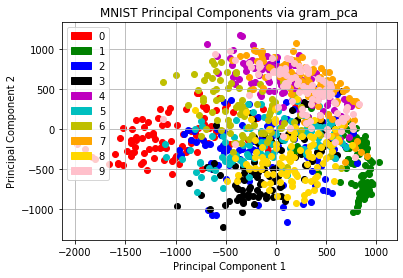

In [15]:
# Insert Code for Subtask 1.3 here
k=2
K=np.dot(train_data.T,train_data)
S_gram=gram_pca(K,k)

# plot the scatter of PC1 and PC2
PC1 = S_gram[0, :]
PC2 = S_gram[1, :]
C = ['r','g','b','k','m','c','y','orange','gold','pink']
i = 0
while i < 10:
    plt.scatter(PC1[samples_class*i : samples_class*i+samples_class-1], PC2[samples_class*i : samples_class*i+samples_class-1], c =C[i])
    i = i+1
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('MNIST Principal Components via gram_pca')
    legend_patch = [mpatches.Patch(color=C[i], label=str(i)) for i in range(0, 10)]
    plt.legend(handles=legend_patch)
plt.grid()
plt.show() 

The principal component 1 produced by  `gram_pca` and `linear_pca` are the same. And the PC2 of the both are additive inverse.  

#### *Part D*
There is an unknown vector space $\mathbb{H}$, equipped with an inner product $\langle . , .\rangle_{\mathbb{H}}$ and a function

$$
\varphi : \mathbb{R}^p \rightarrow \mathbb{H},
$$

such that

$$
\langle \varphi(\mathbf{x}) , \varphi(\mathbf{y}) \rangle_\mathbb{H} = \exp{(-\frac{{\|\mathbf{x}-\mathbf{y}\|}^2}{2\sigma^2})}
$$
holds for every $\mathbf{x}, \mathbf{y} \in \mathbb{R}^p$. The expression on the right-hand side of the equation is called the *Gaussian kernel* and $\sigma$ is a parameter to choose by hand.

The function `gaussian_kernel_pca` expects a data matrix $\mathbf{X}$, a reduced dimension number $k$ and a parameter $\sigma$. It returns the first $k$ *Kernel PCA* scores of the data. In other words, the function returns the first $k$ PCA scores of

$$
\varphi(\mathbf{x}_1), \varphi(\mathbf{x}_2), ..., \varphi(\mathbf{x}_N),
$$

where $\mathbf{x}_i$ denotes the $i$-th data sample/ $i$-th column of the data matrix. The function `gaussian_kernel_pca` is already written, but for it to work, the function `compute_gaussian_gram_matrix` must return correct results. Complete `compute_gaussian_gram_matrix` accordingly.

In [17]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    lenth_data = X.shape[1]
    K = np.zeros((lenth_data,lenth_data))
    for i in range(lenth_data):
        for j in range(lenth_data):
            A = X[:,i] - X[:,j]
            B = np.sum(A*A)
            C = np.exp(-1*B/(2*sigma**2))
            K[i,j] = C
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

#### *Part E*
Test `gaussian_kernel_pca` with some MNIST train images and $\sigma = 1000$.

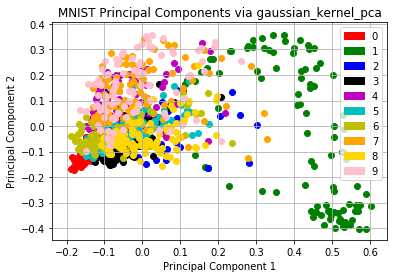

In [18]:
#Insert Code for Subtask 1.5 here
X = train_data
sigma = 1000
k = 2
U=gaussian_kernel_pca(X,k,sigma)

# plot the scatter of PC1 and PC2
PC1 = U[0, :]
PC2 = U[1, :]
C = ['r','g','b','k','m','c','y','orange','gold','pink']
i = 0
while i < 10:
    plt.scatter(PC1[samples_class*i : samples_class*i+samples_class-1], PC2[samples_class*i : samples_class*i+samples_class-1], c =C[i])
    i = i+1
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('MNIST Principal Components via gaussian_kernel_pca')
    legend_patch = [mpatches.Patch(color=C[i], label=str(i)) for i in range(0, 10)]
    plt.legend(handles=legend_patch)
plt.grid()
plt.show() 